# Code uses the radius to create a closed path, this could be beneifcal method for around the eddy edge 
**Code written by: Billy Atkinson (watkinson@umces.edu)** \
**Date of last revision: 08/19/2022** \
**Source Code:** __[Radius Path](https://stackoverflow.com/questions/45957229/matplotlib-path-contains-points-radius-parameter-defined-inconsistently)__

In [2]:
##### we do not need all these packages but these are some of the most important ones I use for your review
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.path as path
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
##### cartopy is also really nice, I just have code already written for basemap
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import glob
import os

In [3]:
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib.patches as patches
import numpy as np
dir = '/data/watkinson/Summer2022/data/eddies/Cyclonic/'
cycl_eddy = xr.open_dataset(dir + 'Cyclonic_20060309.nc')
lon = cycl_eddy.effective_contour_longitude[0,:]
lat = cycl_eddy.effective_contour_latitude[0,:]
verts=np.vstack((lon,lat)).T
print(verts)
ccwPath=path.Path(verts, closed=True) 
cwPath=path.Path(verts[::-1,:], closed=True)
#print(np.shape(cwPath))
radius = cycl_eddy.effective_radius[0]
#print(radius)
#r = [radius,radius]
#print(r)
#dir = 
SSH_data = xr.open_dataset('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc')
#ssh = ssh_data.adt
#ssh_data
lon_sat = ssh_data.lon
print(np.size(lat))
lat_sat = ssh_data.lat
plt.scatter(lon,lat,c='green',marker='.')
plt.show()

[[275.04      19.949999]
 [274.96      19.99    ]
 [274.91998   20.02    ]
 [274.88      20.05    ]
 [274.84      20.09    ]
 [274.82      20.119999]
 [274.77      20.24    ]
 [274.76      20.279999]
 [274.75      20.359999]
 [274.75      20.439999]
 [274.75      20.52    ]
 [274.76      20.6     ]
 [274.78      20.68    ]
 [274.82      20.76    ]
 [274.84      20.8     ]
 [274.87      20.84    ]
 [274.91      20.88    ]
 [274.95      20.92    ]
 [275.04      20.99    ]
 [275.12      21.039999]
 [275.2       21.08    ]
 [275.24      21.09    ]
 [275.36      21.119999]
 [275.44      21.119999]
 [275.47998   21.109999]
 [275.54      21.08    ]
 [275.56      21.06    ]
 [275.58      21.      ]
 [275.6       20.92    ]
 [275.6       20.88    ]
 [275.61      20.84    ]
 [275.62      20.8     ]
 [275.63      20.72    ]
 [275.64      20.68    ]
 [275.64      20.64    ]
 [275.63      20.52    ]
 [275.62      20.439999]
 [275.59      20.359999]
 [275.57      20.279999]
 [275.55      20.24    ]


NameError: name 'ssh_data' is not defined

<xarray.DataArray 'adt' ()>
array(-0.78400004, dtype=float32)
<xarray.DataArray 'adt' ()>
array(0.58100003, dtype=float32)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


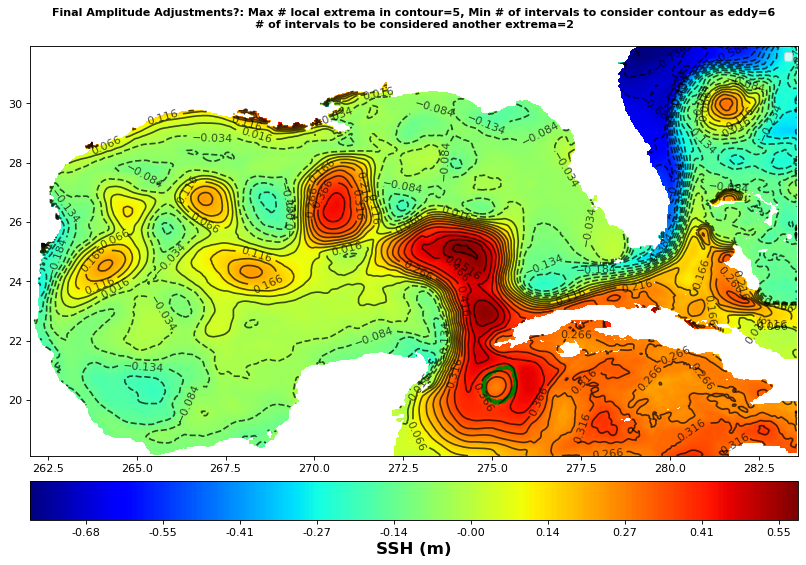

In [37]:
fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.94,.94])
ax = fig.add_axes([.03,.03,.8,.8])
#ax.set_xlim(-97.5, -77.5)
plt.title('Final Amplitude Adjustments?: Max # local extrema in contour=5, Min # of intervals to consider contour as eddy=6' 
        '\n# of intervals to be considered another extrema=2',loc='center',fontsize=10,fontweight='bold',y=1.03)
#plt.suptitle(date,color='red',fontsize=12,fontweight='bold',x=.4,y=.85)
#load in lat, lon and SSh data for plot and print min and max SSH
lat_sat=SSH_data.lat
lon_sat=SSH_data.lon+360
ssh = SSH_data.adt
print(np.min(ssh))
print(np.max(ssh))
#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon_sat,lat_sat)
#cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='viridis',levels=np.linspace(-1.6,1,400))
#cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='w',alpha=.7,levels=np.arange(-1.6,1,.1))
cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(np.min(ssh),np.max(ssh),400))
cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(np.min(ssh),np.max(ssh),.05))
#Use to add legend with the number of anticyclonic and cyclonic eddies that day
#a.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
#c.display(ax, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
#displays all the contours from the HYCOM data and which ones were accepted as eddies and which ones were not including the reason
#g.contours.display(ax,display_criterion=True)
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')
plt.scatter(lon,lat,c='green',marker='.')
_= ax.legend(loc="best")

In [18]:
testPoint=(np.random.rand(400,2))#-.5)*4
print(testPoint)

[[0.73210787 0.49708275]
 [0.06103561 0.55172495]
 [0.15755007 0.37129971]
 [0.7827293  0.77015016]
 [0.49449991 0.34732234]
 [0.23662271 0.95653688]
 [0.99477971 0.26721961]
 [0.03883618 0.19484581]
 [0.09782175 0.26650413]
 [0.49027343 0.18453969]
 [0.50146808 0.0238132 ]
 [0.10441305 0.26891865]
 [0.69260134 0.90083275]
 [0.97639683 0.93750224]
 [0.8502496  0.08108792]
 [0.67750096 0.53774715]
 [0.37949514 0.58436685]
 [0.11406112 0.01533722]
 [0.81730042 0.88418631]
 [0.67294764 0.86751432]
 [0.1121925  0.56330608]
 [0.12643513 0.39163645]
 [0.46303601 0.7088882 ]
 [0.51635098 0.09955536]
 [0.97737231 0.83937609]
 [0.66451375 0.97578623]
 [0.45668812 0.39242592]
 [0.6359706  0.33966402]
 [0.85236813 0.26288262]
 [0.71610834 0.36255722]
 [0.7104709  0.80583364]
 [0.83901899 0.81450458]
 [0.16064292 0.98935899]
 [0.52660583 0.87427666]
 [0.23129171 0.95376898]
 [0.06391471 0.54064054]
 [0.68228065 0.85295892]
 [0.45594949 0.31288332]
 [0.58909766 0.37509937]
 [0.30749856 0.55367139]
